**Data Diri**

*   Nama  : Fahmi Ardiansyah
*   Email : fahmiardiansyah959@students.unnes.ac.id

In [17]:
from google.colab import files
uploaded = files.upload()

Saving stockerbot-export.csv to stockerbot-export.csv


In [66]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baca dataset
df = pd.read_csv('stockerbot-export.csv', nrows=10)  # Membaca hanya 10 baris pertama
print(df.head())  # Menampilkan 10 baris pertama untuk inspeksi

# Drop kolom yang tidak digunakan
df = df.drop(columns=['id', 'timestamp', 'source', 'symbols', 'company_names', 'url'])

# Download the stopwords resource
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing teks
stop_words = set(stopwords.words('english'))
tokenizer = Tokenizer(num_words=15, oov_token='<oov>')
tokenizer.fit_on_texts(df['text'])  # Gunakan kolom 'text' sebagai teks

# Tokenisasi dan padding
x_filtered_encoded = tokenizer.texts_to_sequences(df['text'])  # Gunakan kolom 'text'
x_filtered_padded = pad_sequences(x_filtered_encoded, maxlen=300, padding='post', truncating='post')
x_filtered_padded[x_filtered_padded >= 15] = tokenizer.word_index['<oov>']

# Label dan data
y = df['text'].str.contains('Bitcoin').astype(int)  # Ganti target variabel dengan prediksi keberadaan kata 'Bitcoin'

# Menampilkan total jumlah data
total_data = df.shape[0]
print("Total Jumlah Data:", total_data)

# Split data menjadi train dan test sets
x_train, x_test, y_train, y_test = train_test_split(x_filtered_padded, y, test_size=0.2) # Data validasi sebesar 20 %

# Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(3000, 100, input_length=300))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Gunakan sigmoid untuk masalah klasifikasi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Gunakan binary_crossentropy dan akurasi
model.summary()

# Callback untuk early stopping
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss') < 0.1):  # Contoh threshold, sesuaikan dengan skala masalah Anda
            print("\nLoss pada validation set rendah, hentikan pelatihan.")
            self.model.stop_training = True
callbacks = myCallback()

# Train model
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[callbacks])



                    id                                               text  \
0  1019696670777503700  VIDEO: “I was in my office. I was minding my o...   
1  1019709091038548000  The price of lumber $LB_F is down 22% since hi...   
2  1019711413798035500  Who says the American Dream is dead? https://t...   
3  1019716662587740200  Barry Silbert is extremely optimistic on bitco...   
4  1019718460287389700  How satellites avoid attacks and space junk wh...   

                        timestamp        source symbols      company_names  \
0  Wed Jul 18 21:33:26 +0000 2018  GoldmanSachs      GS  The Goldman Sachs   
1  Wed Jul 18 22:22:47 +0000 2018    StockTwits       M             Macy's   
2  Wed Jul 18 22:32:01 +0000 2018     TheStreet     AIG           American   
3  Wed Jul 18 22:52:52 +0000 2018   MarketWatch     BTC            Bitcoin   
4  Wed Jul 18 23:00:01 +0000 2018        Forbes    ORCL             Oracle   

                                                 url  verified  
0  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 300, 100)          300000    
                                                                 
 lstm_12 (LSTM)              (None, 64)                42240     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 344,353
Trainable params: 344,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6760 - accuracy: 1.0000 - val_loss: 0.6499 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==========================

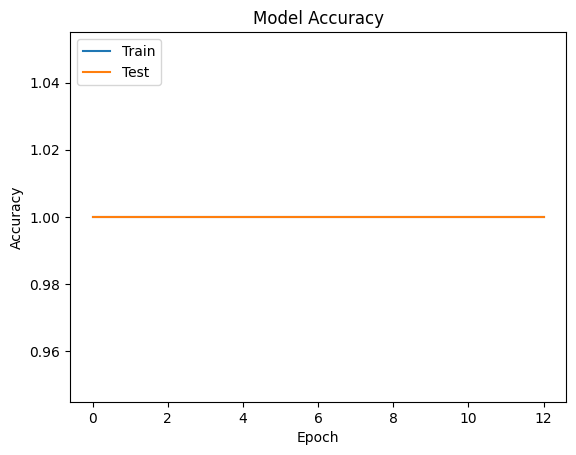

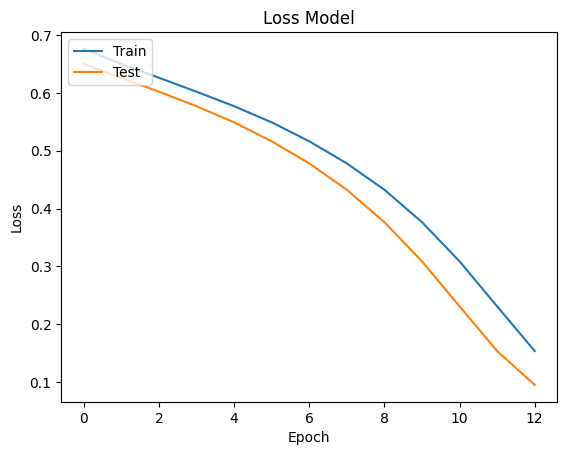

In [67]:
# Visualisasi akurasi
plt.plot(hist.history['accuracy'])  # Menggunakan akurasi untuk visualisasi
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualisasi loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
